In [1]:
import torch
import sys
sys.path.append("/home/tuxae/MVA/recvis21_a3")

%load_ext autoreload
%autoreload 2

from torch import nn
from torchsummary import summary

# Data initialization and loading
from src.data import data_transforms
from torchvision import datasets

from PIL import Image
from torchvision import transforms

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

from tqdm.notebook import tqdm_notebook

In [2]:
MODEL = torch.hub.load("facebookresearch/WSL-Images", "resnext101_32x48d_wsl")
BATCH_SIZE = 16
DATA_PATH = "../cropped_bird_dataset"
DATA_TRANSFORMS = transforms.Compose(
    [
        transforms.transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)
EMBEDDINGS_PATH = "../embeddings"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Using cache found in /home/tuxae/.cache/torch/hub/facebookresearch_WSL-Images_main


## Extract embeddings for images using a model pretrained on COCO

In [3]:
def slice_model(original_model, from_layer=None, to_layer=None):
    return nn.Sequential(*list(original_model.children())[from_layer:to_layer])

model_conv_features = slice_model(MODEL, to_layer=-1).to(device)

# Get summary of the model
summary(model_conv_features, input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5         [-1, 1536, 56, 56]          98,304
       BatchNorm2d-6         [-1, 1536, 56, 56]           3,072
              ReLU-7         [-1, 1536, 56, 56]               0
            Conv2d-8         [-1, 1536, 56, 56]         663,552
       BatchNorm2d-9         [-1, 1536, 56, 56]           3,072
             ReLU-10         [-1, 1536, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         393,216
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

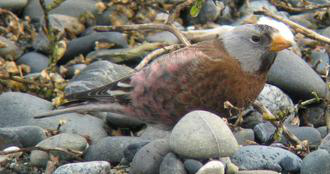

In [4]:
filename = "../cropped_bird_dataset/train_images/034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0064_27007.jpg"
input_image = Image.open(filename)
input_image

In [5]:
# pre-processing required by ResNext
preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    #transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


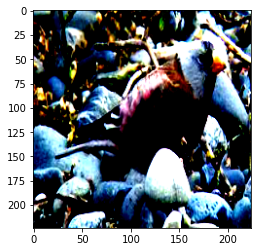

In [6]:
# Plotting the preprocessed picture to be usable by the model
# the range of values now fall outside the [0..1] RGB valid range
plt.imshow(np.moveaxis(input_tensor.numpy(), 0, -1 ))
plt.show()

In [7]:
input_batch = torch.stack([input_tensor])
input_batch = input_batch.to(device)

# applying the model to the pre-processed picture and extracting the 2048 ResNext features
with torch.no_grad():
    output = model_conv_features(input_batch).flatten(start_dim=1)
print('shape', output.shape)

shape torch.Size([1, 2048])


In [ ]:
output

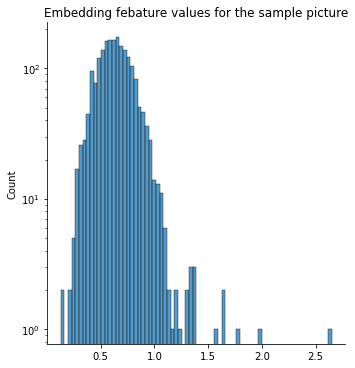

In [8]:
sns.displot(output[0].cpu().numpy())
# plt.xscale('log')
plt.yscale('log')
plt.title('Embedding febature values for the sample picture')
plt.show()

## Now that we've done it on a single image, let's do it on all the images

In [3]:
from src.FeatureExtractor import FeatureExtractor

feature_extractor = FeatureExtractor(
    model = MODEL, 
    data_path = DATA_PATH, 
    dest_path = EMBEDDINGS_PATH, 
    batch_size = BATCH_SIZE, 
    data_transforms = DATA_TRANSFORMS, 
    device = device
)
feature_extractor.extract_features()

Using cache found in /home/tuxae/.cache/torch/hub/facebookresearch_WSL-Images_main


  0%|          | 0/3 [00:00<?, ?it/s]

Start working on:  train
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on another batch
work on